# `ANOVA Explained`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# `Purpose & Outcome:`

+ Understand technique and background/motivation
+ visually, see what is going on for clarification
+ Show example implemented

**Help Support the Channel: Buy Me A Coffee, @mrfugudatasci**

`Good Read: Statistics An Introduction by Michael J. Crawley`

In [1]:
library(ggplot2)
library(tidyverse)
library(reshape2)
library(tidyr)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




# `What is ANOVA?`

# <font color=red>AN</font>alysis <font color=red>O</font>f <font color=red>VA</font>riance

A technique used when all explanatory variables are categorical.
+ The explanatory variables are called factors
+ Idea of ANOVA `compares 2 or more, means` ($\mu's$)
    + This is done by calculating the variance ($\sigma^2$)
    + we are trying to study if our measurements are similar for different treatments (levels)

`This is a Hypothesis Test:`
+ The `null hypothesis` ($H_o$) : all samples means ($\mu's$) are equal or they don't have any significant difference $H_o: \mu_1=\mu_2=\mu_3...$ 

+ `Alternate Hypothesis` ($H_{alt}$) : is there at least 1 $\mu$ that is different

# `Why Not Just do a T-test?`
+ Well, you are going to have issues going above 2 sample $\mu's$ for comparisons. You will have to get combinations of all of them.

`ex.) if we had 3 sample means with an alpha=0.05` then we would end up with $(0.95)*(0.95)*(0.95)=0.8573$ then you need to do $1-0.8573 = 0.143$ error rate increased! *NOT GOOD*

# `Between Group Variability:`

**PAY Attention:** `Between ALL Sample Means`

We are trying to find out do the sample means come from a common population?

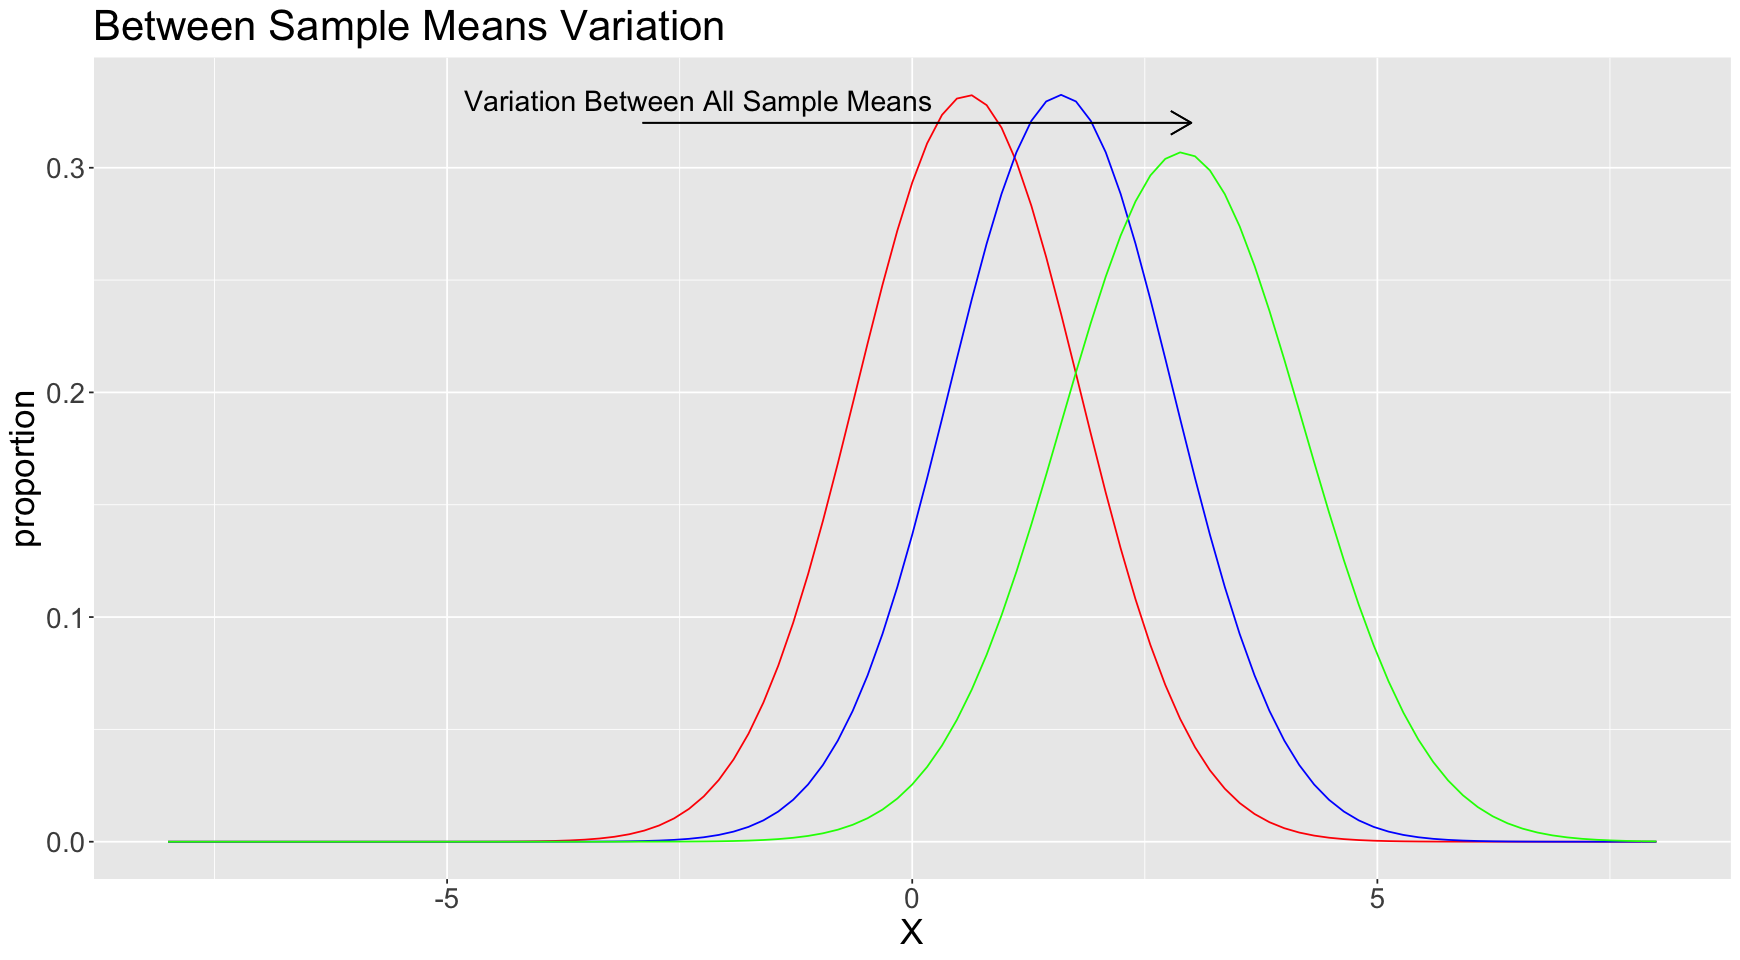

In [2]:
options(repr.plot.width=14.5, repr.plot.height=8)

ggplot(data.frame(x = c(-8, 8)), aes(x)) + 
  mapply(function(mean, sd, col) {
    stat_function(fun = dnorm, args = list(mean = mean, sd = sd), col = col)
  }, 
  # enter means, standard deviations and colors here
  mean = c(.6, 1.6,2.9 ), 
  sd = c(1.2, 1.2, 1.3), 
  col = c('red', 'blue', 'green')
) +
labs(title = "Between Sample Means Variation",
       x = "X",
       y = "proportion") +
theme(text=element_text(size=21))+
geom_segment(aes(x = -2.9, y = .32, xend = 3, yend = .32),
                  arrow = arrow(length = unit(0.5, "cm")))+
annotate('text', x = -2.3, y = .33, label = 'Variation Between All Sample Means',size=6)

# `We are comparing how close we are to the population`<font size=6>$\mu.$</font> 

`(between means)`

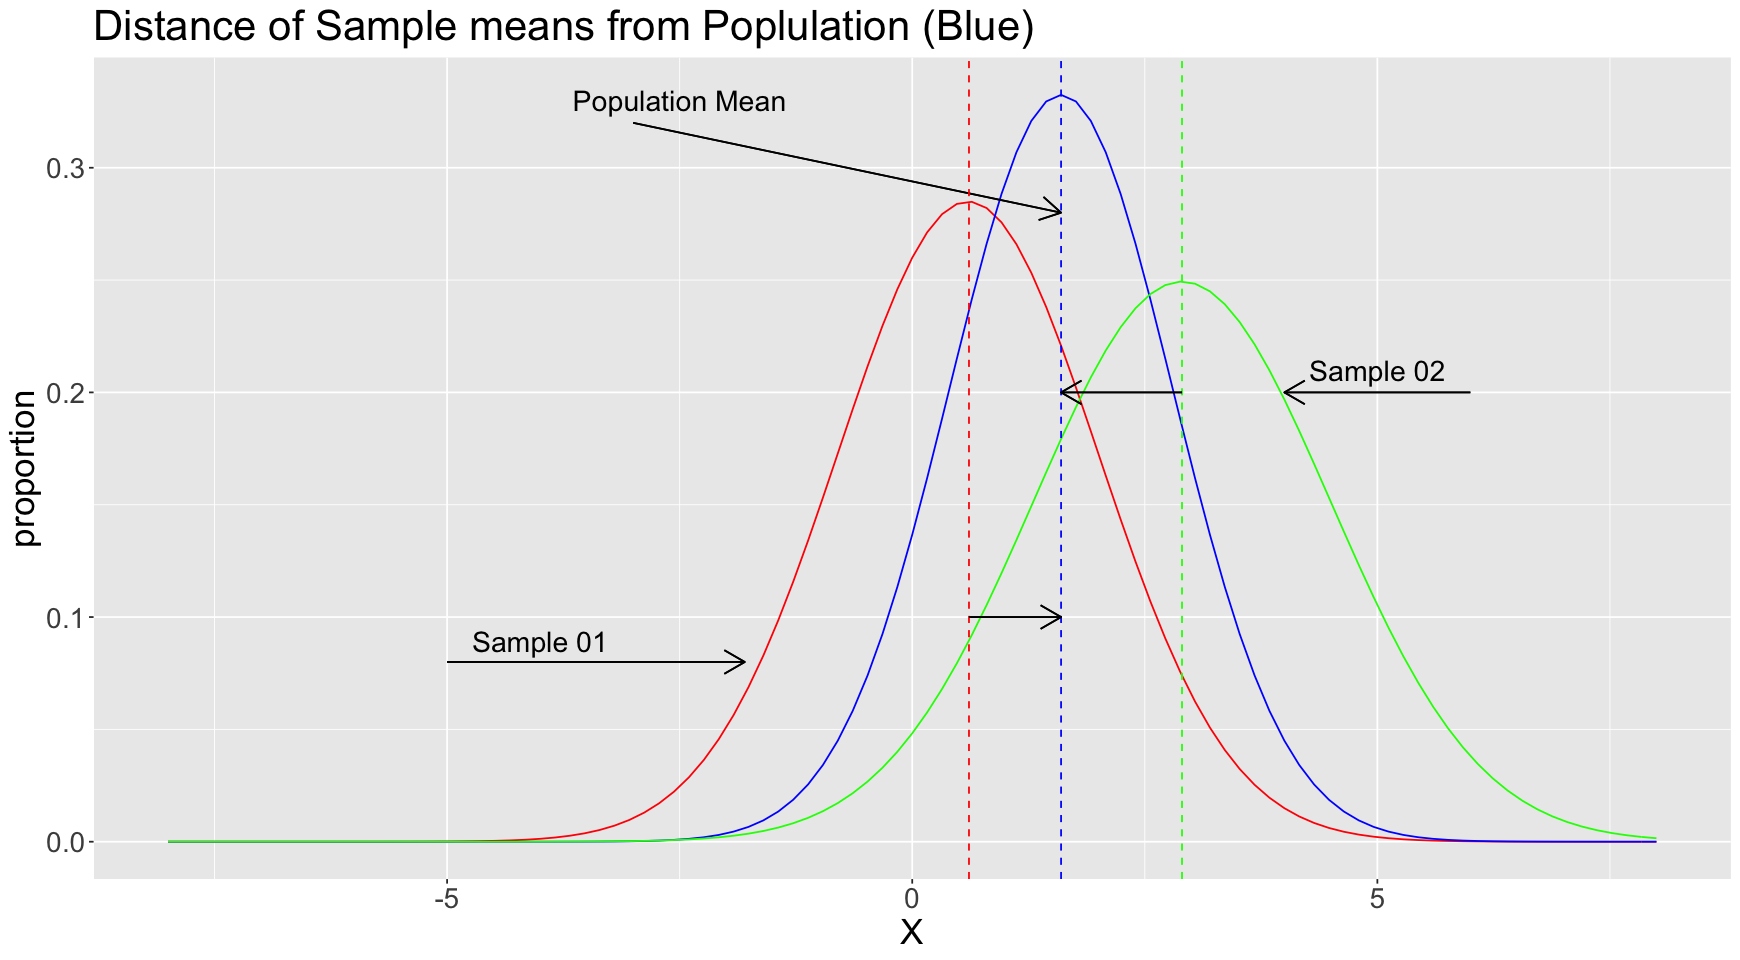

In [71]:
options(repr.plot.width=14.5, repr.plot.height=8)
ggplot(data.frame(x = c(-8, 8)), aes(x)) + 
  mapply(function(mean, sd, col) {
    stat_function(fun = dnorm, args = list(mean = mean, sd = sd), col = col)
  }, 
  # enter means, standard deviations and colors here
  mean = c(.6, 1.6,2.9 ), 
  sd = c(1.4, 1.2, 1.6), 
  col = c('red', 'blue', 'green')
) +
labs(title = "Distance of Sample means from Poplulation (Blue)",
       x = "X",
       y = "proportion") +
theme(text=element_text(size=21))+
geom_segment(aes(x = -3, y = .32, xend = 1.6, yend = .28),
                  arrow = arrow(length = unit(0.5, "cm")))+
annotate('text', x = -2.5, y = .33, label = 'Population Mean',size=6)+
geom_vline(xintercept = .61,linetype = "dashed", colour = "red",show.legend = FALSE)+
geom_vline(xintercept = 1.6,linetype = "dashed", colour = "blue",show.legend = FALSE)+
geom_vline(xintercept = 2.9,linetype = "dashed", colour = "green",show.legend = FALSE)+
geom_segment(aes(x = .61, y = .1, xend = 1.6, yend = .1),
                  arrow = arrow(length = unit(0.5, "cm")))+
geom_segment(aes(x = 2.9, y = .2, xend = 1.6, yend = .2),
                  arrow = arrow(length = unit(0.5, "cm")))+

geom_segment(aes(x = -5, y = .08, xend = -1.8, yend = .08),
                  arrow = arrow(length = unit(0.5, "cm")))+
annotate('text', x = -4, y = .089, label = 'Sample 01',size=6)+
geom_segment(aes(x = 6, y = .2, xend = 4, yend = .2),
                  arrow = arrow(length = unit(0.5, "cm")))+
annotate('text', x = 5, y = .21, label = 'Sample 02',size=6)

# `________VS___________`


# `Within Group Variability:`

**Not same as above:** `Variation for Each Sample (variance)`

Think of the spread, for each sample.
+ No, interactions between samples are considered.

*`Notice the overlapping:`* this will become part of the population

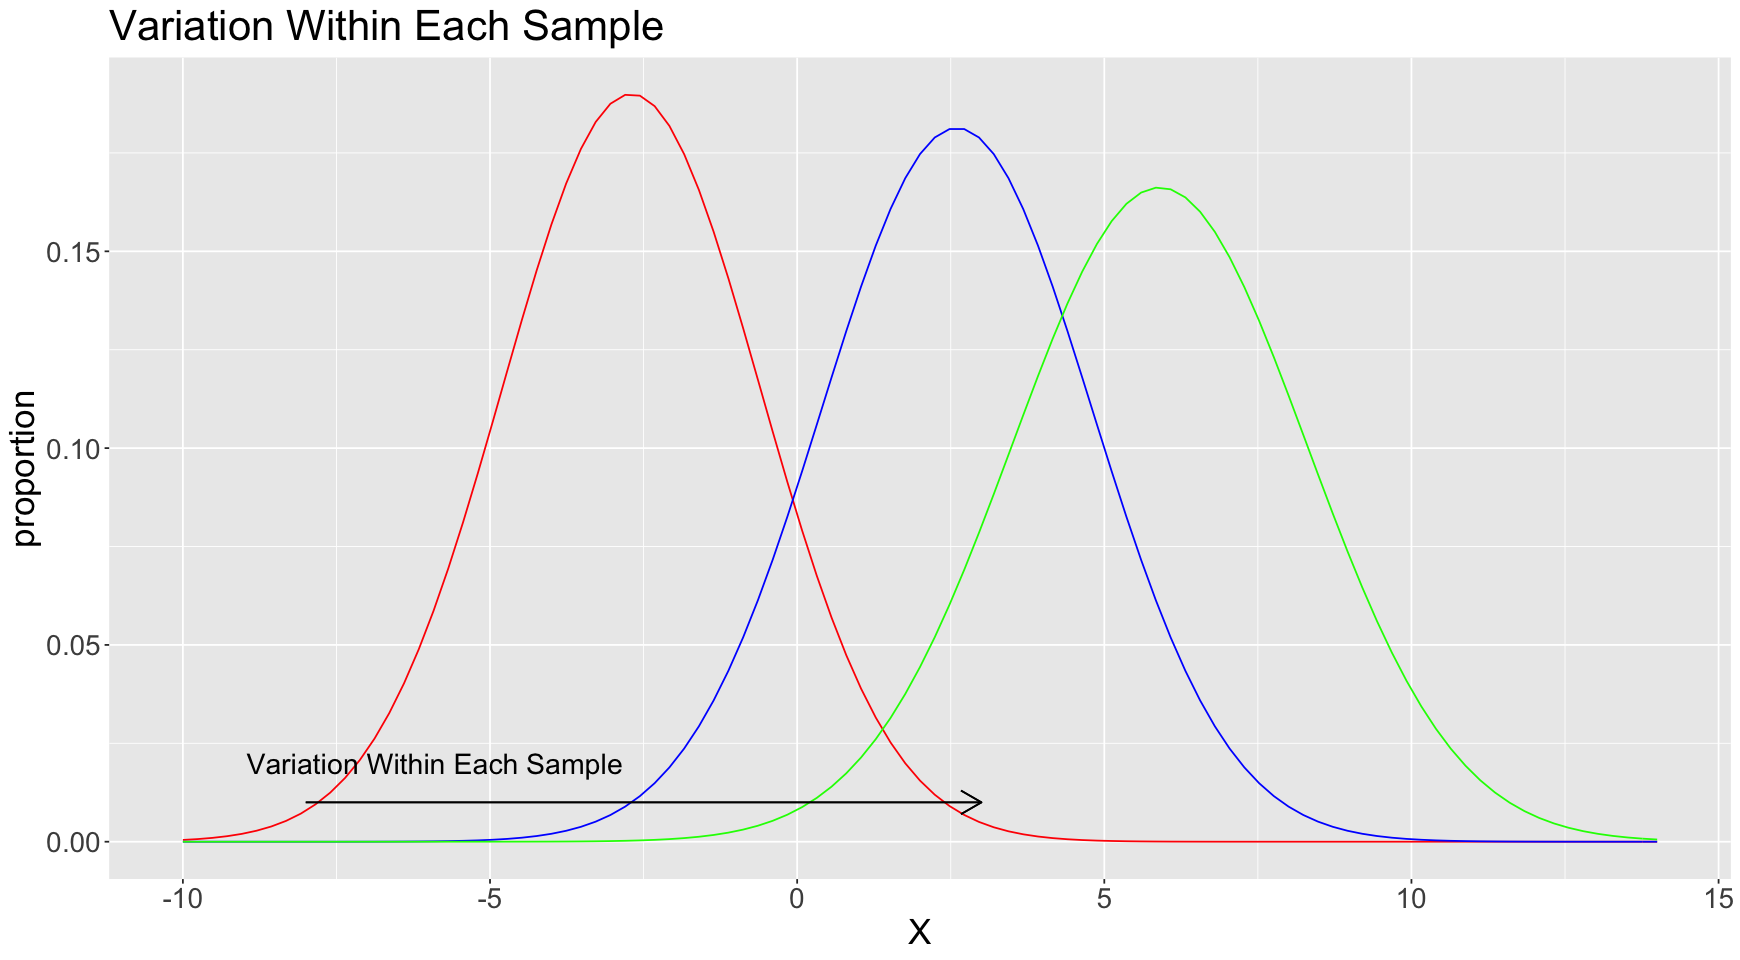

In [4]:
options(repr.plot.width=14.5, repr.plot.height=8)

ggplot(data.frame(x = c(-10, 14)), aes(x)) + 
  mapply(function(mean, sd, col) {
    stat_function(fun = dnorm, args = list(mean = mean, sd = sd), col = col)
  }, 
  # enter means, standard deviations and colors here
  mean = c(-2.7, 2.6,5.9 ), 
  sd = c(2.1, 2.2, 2.4), 
  col = c('red', 'blue', 'green')
) +
labs(title = "Variation Within Each Sample",
       x = "X",
       y = "proportion") +
theme(text=element_text(size=21))+
geom_segment(aes(x = -8, y = .01, xend = 3, yend = .01),
                  arrow = arrow(length = unit(0.5, "cm")))+
annotate('text', x = -5.9, y = .02, label = 'Variation Within Each Sample',size=6)

# `Now What?`

We are `dealing with variance comparisons for (between) vs (within)`

This leads us to:

**`Total_Variance = Variance_Between + Variance_Within`**

This leads to closer to our: **`F-score`**

`--------------------`

# `F-Test:`

+ Measures if the means of different samples are significantly different
    + The lower the F-ratio, the more similar the sample means ($\mu's$)
        + And therefore keep (fail to reject) the null hypothesis ($H_o$)

`F_stat = between group variability / within group variability` 

`----------------------------------------------------------------------`

    
| **Source of Variation**     	| **Sum of Squares**                        	| **Degrees of Freedom** 	| **Mean Squares**            	| **F**               	|
|-----------------------------	|-------------------------------------------	|------------------------	|-----------------------------	|---------------------	|
| **Between Treatments**      	| $SS_{btwn}=\sum_{n_j}(\bar x_j-\bar x)^2$ 	| k-1                    	| $MSB=\frac{SS_{btwn}}{k-1}$ 	| $F=\frac{MSB}{MSE}$ 	|
| **Within:(residual/error)** 	| $SS_{w/i}=\sum\sum(x-\bar x_j)^2$         	| N-k                    	| $MSE=\frac{SSE}{N-k}$       	|                     	|
| **Total**                   	| $SS_{total}=\sum\sum(x-\bar x)^2$         	| N-1                    	|                             	|                     	|

# `Between Groups:`

+ This is the numerator term of the `F-stat`; think about this as the numerator grows, we will have the likelihood of our data coming from a different population and the means are going further from each other. 

`To calculate:`

we need the `SS_between =`$n_1(\bar x_1-\bar x_{pop})^2+n_2(\bar x_2-\bar x_{pop})^2+...+n_n(\bar x_n-\bar x_{pop})^2$

<font size=5>$MS_{btwn}=\frac{n_1(\bar x_1-\bar x_{pop})^2+n_2(\bar x_2-\bar x_{pop})^2+...+n_n(\bar x_n-\bar x_{pop})^2}{k-1}$</font>



`----------------------------------------`

# `Within Groups:`

<font size=4>$SS_{w/i}= \sum(x_{i,1}-\bar x_1)^2+\sum(x_{i,2}-\bar x_2)^2+...\sum(x_{i,n}-\bar x_n)^2=\sum(x_{i,n}-\bar x_n)^2$</font>

`Then`

<font size=4>$DF=(n_1-1)+(n_2-1)+...(n_k-1)=(N-k) =(sampleSize-NumSamples)$</font>

`we get`

<font size=5>$MS_{w/i}= \frac{MS_{w/i}}{(N-k)}$</font>

`---------------------------`

# `Combine everything to get F-stat:`

<font size=5>$F=\frac{MS_{btwn}}{MS_{w/i}}$</font>

+ As the numerator grows, the sample ($\mu's$) grow apart meaning that they come from different populations.

+ `Important:` if the F-stat we calculate is more than the F-critical at a specific $\alpha$ then we will reject the $H_o$
    + this means that any value to the right of our $\alpha$ will be the rejeciton area

    + If the `within value is smaller than the between`: then the F-stat will be smaller and we will have `No significant difference` between $\mu's$

+ On the otherhand, if the `F-stat is larger than 1`, it will mean that our data came from different populations 
`ex.) if we had` <font size=5>$\frac{Large_{(Btwn)}}{Small_{(w/i)}}=Reject H_o$</font>

+ This can occur if we had 1 or more $\mu's$ that were an outlier.
    + Then this can create a large variance descrepancy for us

# `Ex. ) Suppose we have 3 diet programs:`

| Low Fat 	| High Fat 	| High Carbs 	| Control Group 	|
|---------	|----------	|------------	|---------------	|
| 3       	| 5        	| 1          	| 2             	|
| 2       	| 3        	| -1         	| 1             	|
| 4       	| 2        	| 2          	| 3             	|
| 1       	| 6        	| 3          	| 0             	|
| -1      	| 2        	| -2         	| 1             	|

Let's assume this these values are the amount of weight in pounds lost of the course of the 10 week study. There were 20 patients, assigned randomly to each group.

# `How Do We Setup The Problems?`

**`1. ) Establish Null Hypothesis`**

`Answer:`$H_o=\mu_1=\mu_2=...\mu_n$ and $H_{alt}$= is at least 1 $\mu$ different

**`2. ) What test statistic will we use?`**

`Answer: F-stat` 

**`3. ) What will be our Decision Criteria?`**

`Answer:` we can use $\alpha=0.05$, find Degrees of Freedom as well

**`4. ) Compute the F-stat:`**

`Answer:`<font size=5>$F=\frac{MS_{btwn}}{MS_{w/i}}$</font>

`-------------------------`

In [257]:
# Our data: for 4 different diet plans (factor)
low_fat<- c(3,2,4,1,-1)
high_fat<- c(5,3,2,6,2)
high_carb<- c(1,-1,2,3,-2)
control<- c(2,1,3,0,1)

# Combine into a single vector:

all_dat <- c(low_fat,high_fat,high_carb,control)

# create preated groups 1:4*len(group=5)
n <- rep(5,4)

groups <-rep(1:4,n)


In [6]:
data <- data.frame(y = all_dat, group = factor(groups))

# linear model
fit <- lm(y ~ group, data)

# anova, test=F is my backup to reassure I do f-test
anova(fit,test = 'F')

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
group,3,24.15,8.05,2.555556,0.09173184
Residuals,16,50.40,3.15,NA,NA


In [35]:
# F-Critical: Expected value (quantile returns a value remember!)
print('F-Critical Value for (df_1=3,df_2=18)')

round(qf(.05,3,16,lower.tail = FALSE),2)

[1] "F-Critical Value for (df_1=3,df_2=18)"


[1] 3.24

In [8]:
# Second way to do this:
oneway.test(y ~ groups,
  data = data,
  var.equal = TRUE # assuming equal variances
)


	One-way analysis of means

data:  y and groups
F = 2.5556, num df = 3, denom df = 16, p-value = 0.09173


In [9]:
# Third way to do this:
summary(aov(lm(data = data)))

            Df Sum Sq Mean Sq F value Pr(>F)  
group        3  24.15    8.05   2.556 0.0917 .
Residuals   16  50.40    3.15                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

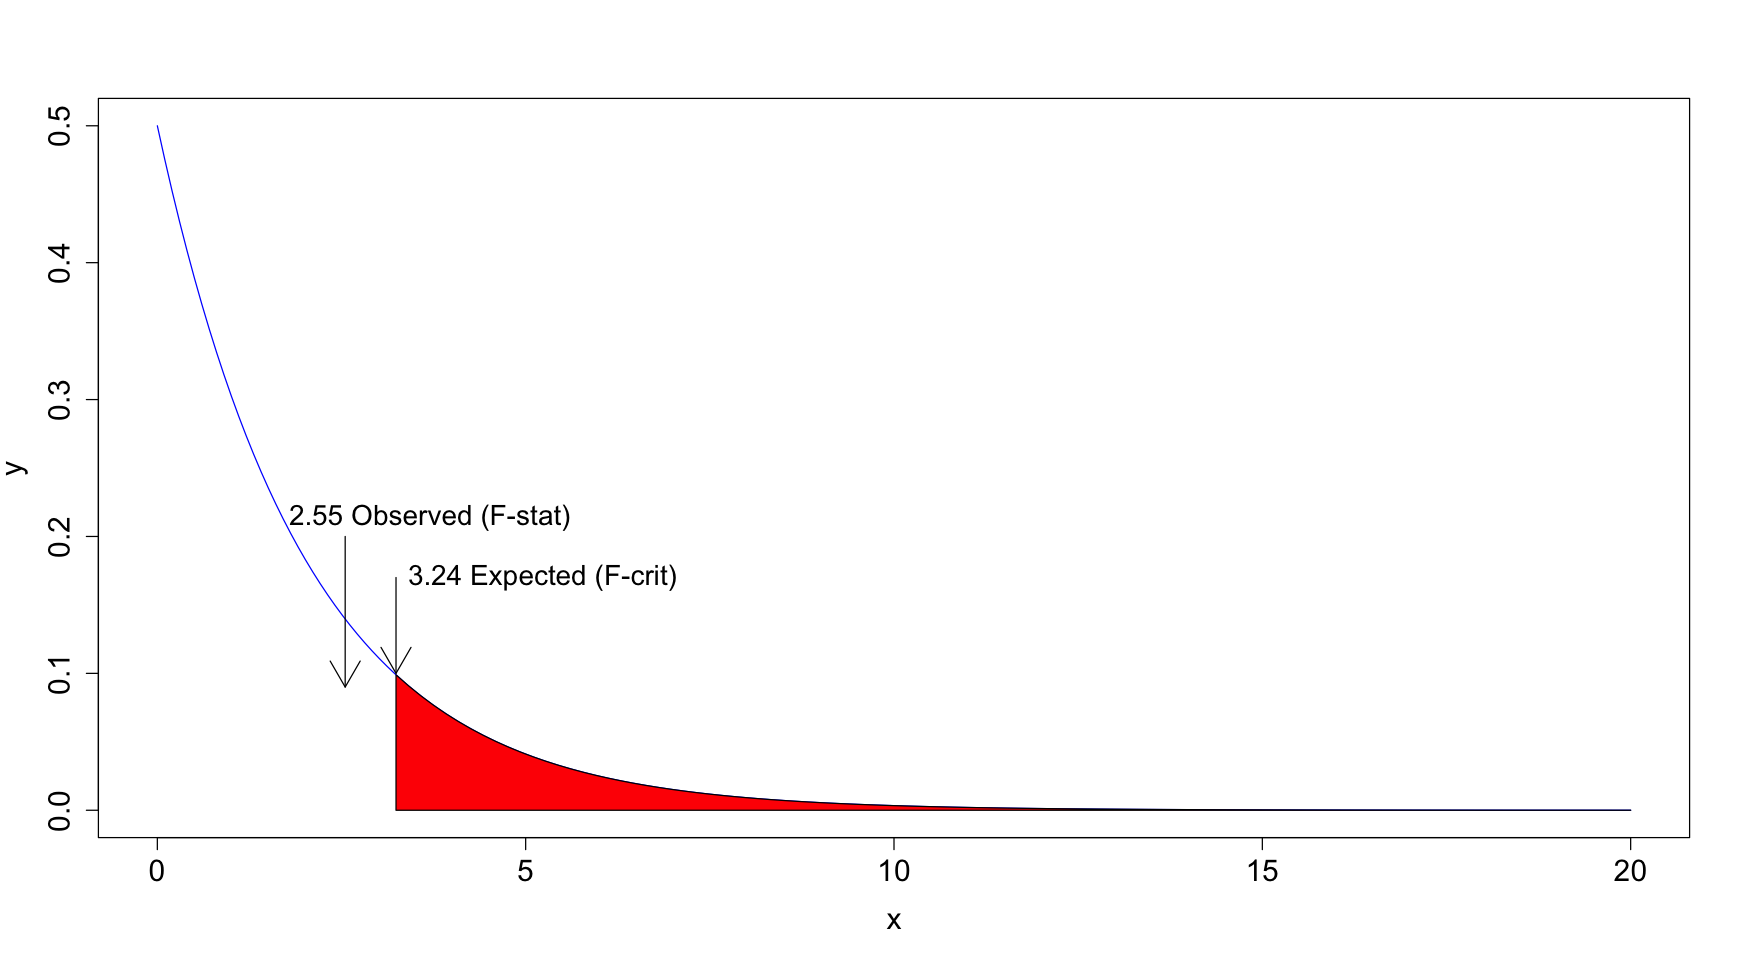

In [83]:
options(repr.plot.width=14.5, repr.plot.height=8)

x=seq(0,20,length=200)
y=dchisq(x,2)
plot(x,y,type="l",col="blue",cex.axis=1.5,cex.lab=1.5)
xx=seq(3.24,20,length=100)
yy=dchisq(xx,2)
polygon(c(3.24,xx,20),c(0,yy,0),col="red")
arrows(2.55,0.2,2.55,0.09)
text(3.7,0.2,"2.55 Observed (F-stat)",pos=3,cex=1.4)
arrows(3.24,.17,3.24,.1)
text(3.24,.17,"3.24 Expected (F-crit)",pos=4,cex=1.4)


# `What is the take away?`

+ The F-stat was less than the f-crit value. Therefore, we keep the null hypothesis.
    + We are saying that the data we observed are from a similar population.
        + or say: the means are NOT significantly different
    + The p-value > 0.05 threshold as well. 
+ The red region is our rejection zone. 

+ Now, what does the `F-crit=3.24` tell use?
    + we used an $\alpha=0.05$, meaning that $5%$ of our data fall ($>=$) this value
    
`Therefore, we DO NOT have a significant difference in mean weight loss with these diets.`

In [261]:
summary(aov(lm(data,data = data)))

            Df Sum Sq Mean Sq F value Pr(>F)  
group        3  24.15    8.05   2.556 0.0917 .
Residuals   16  50.40    3.15                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# `Let's Work Backwords to get values:`

+ hardcoded just to give some clarity! (don't get mad at me)

In [236]:
# Table showing column sums and variances etc
tmpfn = function(x) c(sum = sum(x), mean = mean(x), var = var(x),
n = length(x))
tapply(data$y, data$group, tmpfn)

$`1`
 sum mean  var    n 
 9.0  1.8  3.7  5.0 

$`2`
 sum mean  var    n 
18.0  3.6  3.3  5.0 

$`3`
 sum mean  var    n 
 3.0  0.6  4.3  5.0 

$`4`
 sum mean  var    n 
 7.0  1.4  1.3  5.0

In [251]:
# add the means together and divide by number of means
big_mn<-(1.8+3.6+.6+1.4)/4

# SS_btwn, pay attention to the 5, each number of samples
group_dt<-5*(1.8-big_mn)^2+5*(3.6-big_mn)^2+5*(.6-big_mn)^2+5*(1.4-big_mn)^2

print('Btwn Sum Sq')
group_dt

# Within 
within_dt<-sum((data$y[data$group==1]-1.8)^2)+sum((data$y[data$group==2]-3.6)^2)+
sum((data$y[data$group==3]-.6)^2)+sum((data$y[data$group==4]-1.4)^2)

print('Within,error/residuals')
within_dt

print('Mean SQ btwn')
group_dt/3

print('Mean SQ within') # dividing by DF
within_dt/16

[1] "Btwn Sum Sq"


[1] 24.15

[1] "Within,error/residuals"


[1] 50.4

[1] "Mean SQ btwn"


[1] 8.05

[1] "Mean SQ within"


[1] 3.15

# `Now To our Assumptions:`

+ Check for `normality` may need to try transformation of data
    + `Visually: qqplot, histogram`
    + `Numerically: Shapiro-Wilks or Kolmogorov-Smirnov test`
        + If these fail consider the `Kruskall-Wallis test`
+ `Equality of Variance`
    + `Visually: dotplot,boxplot`
    + `Numerically: levene test,Bartlett test`
        + If the equality of variance fails consider: `Welch test: oneway.test()`

# `Test for Normality:`

+ Qqplt, Histogram and Shapiro-Wilk test

Before checking the normality we need to use the anova, in order to plot the residuals

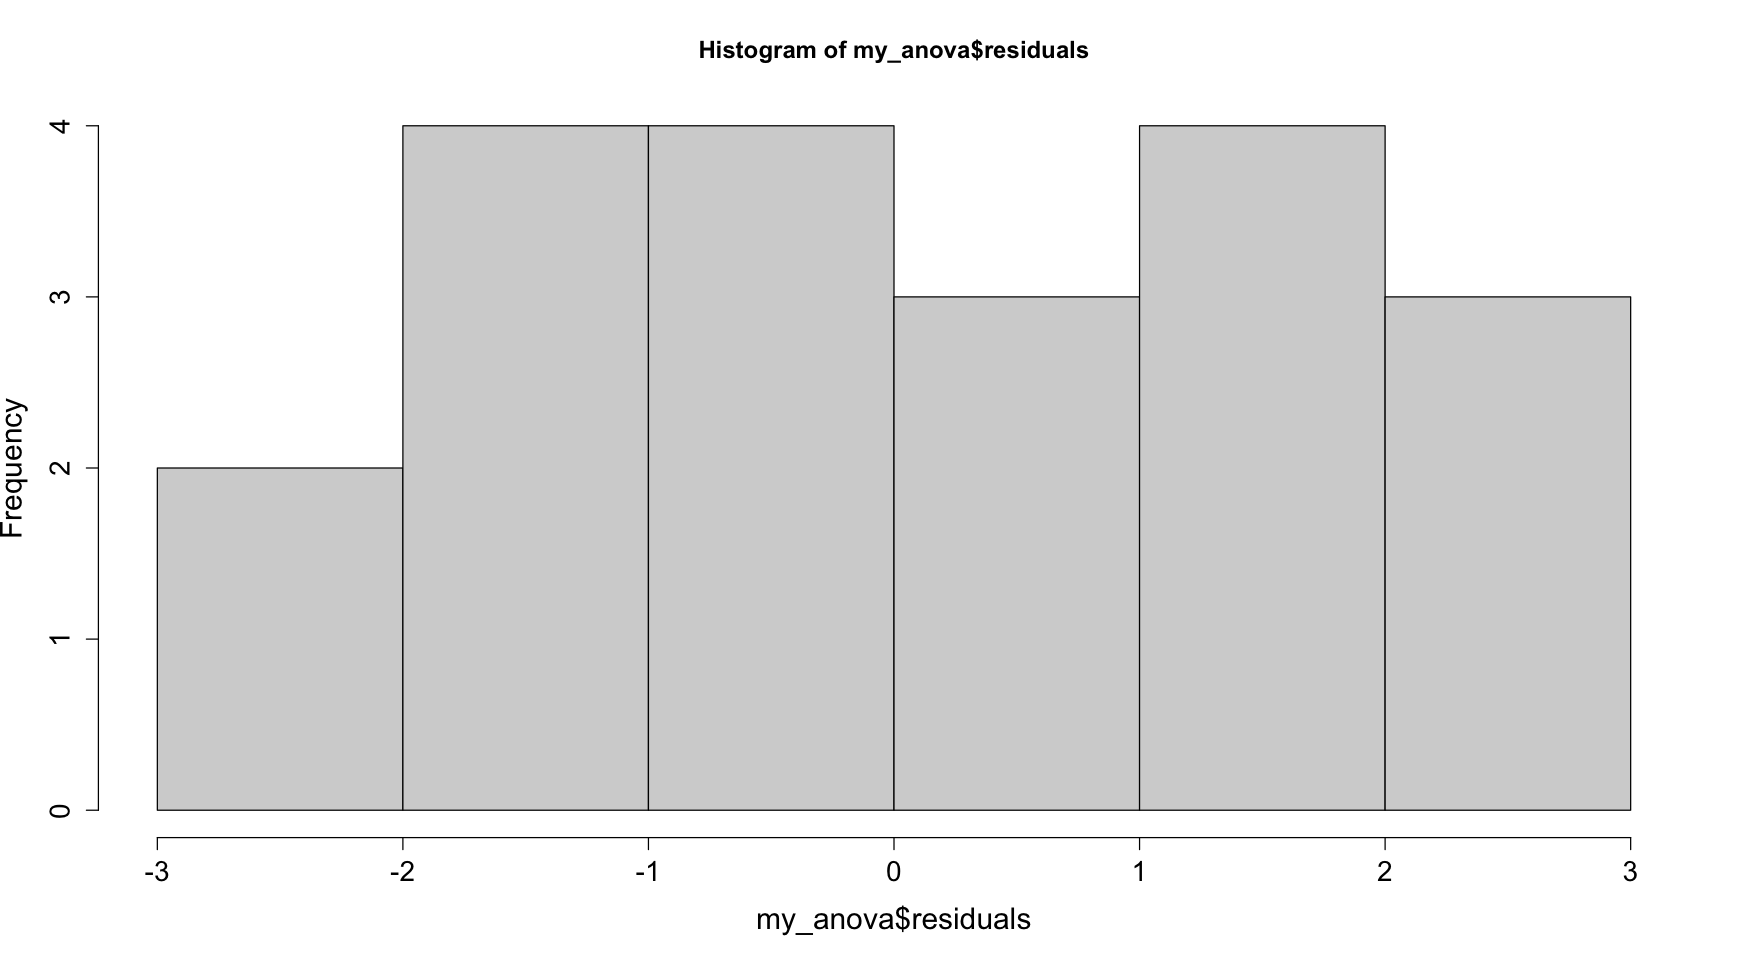

In [246]:
# Histogram of Residuals from Anova:

my_anova<-aov(lm(data = data))
hist(my_anova$residuals,cex.lab=1.5,cex.axis=1.4)

[1]  9 15

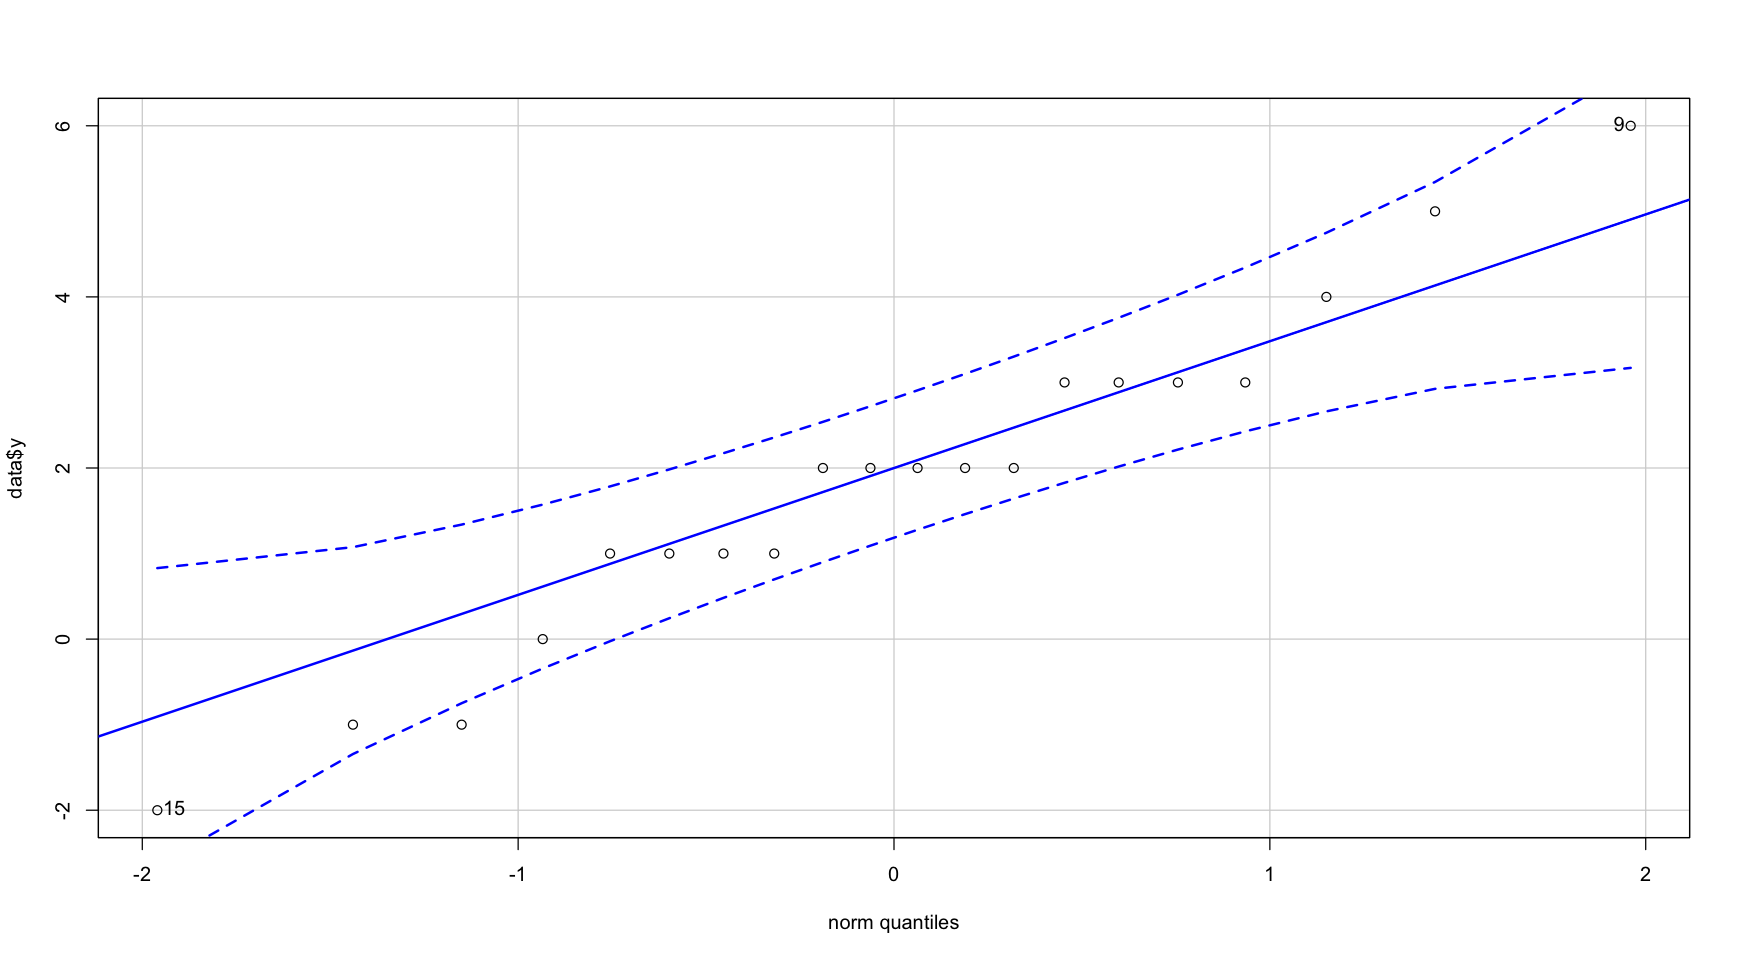

In [248]:
qqPlot(data$y)

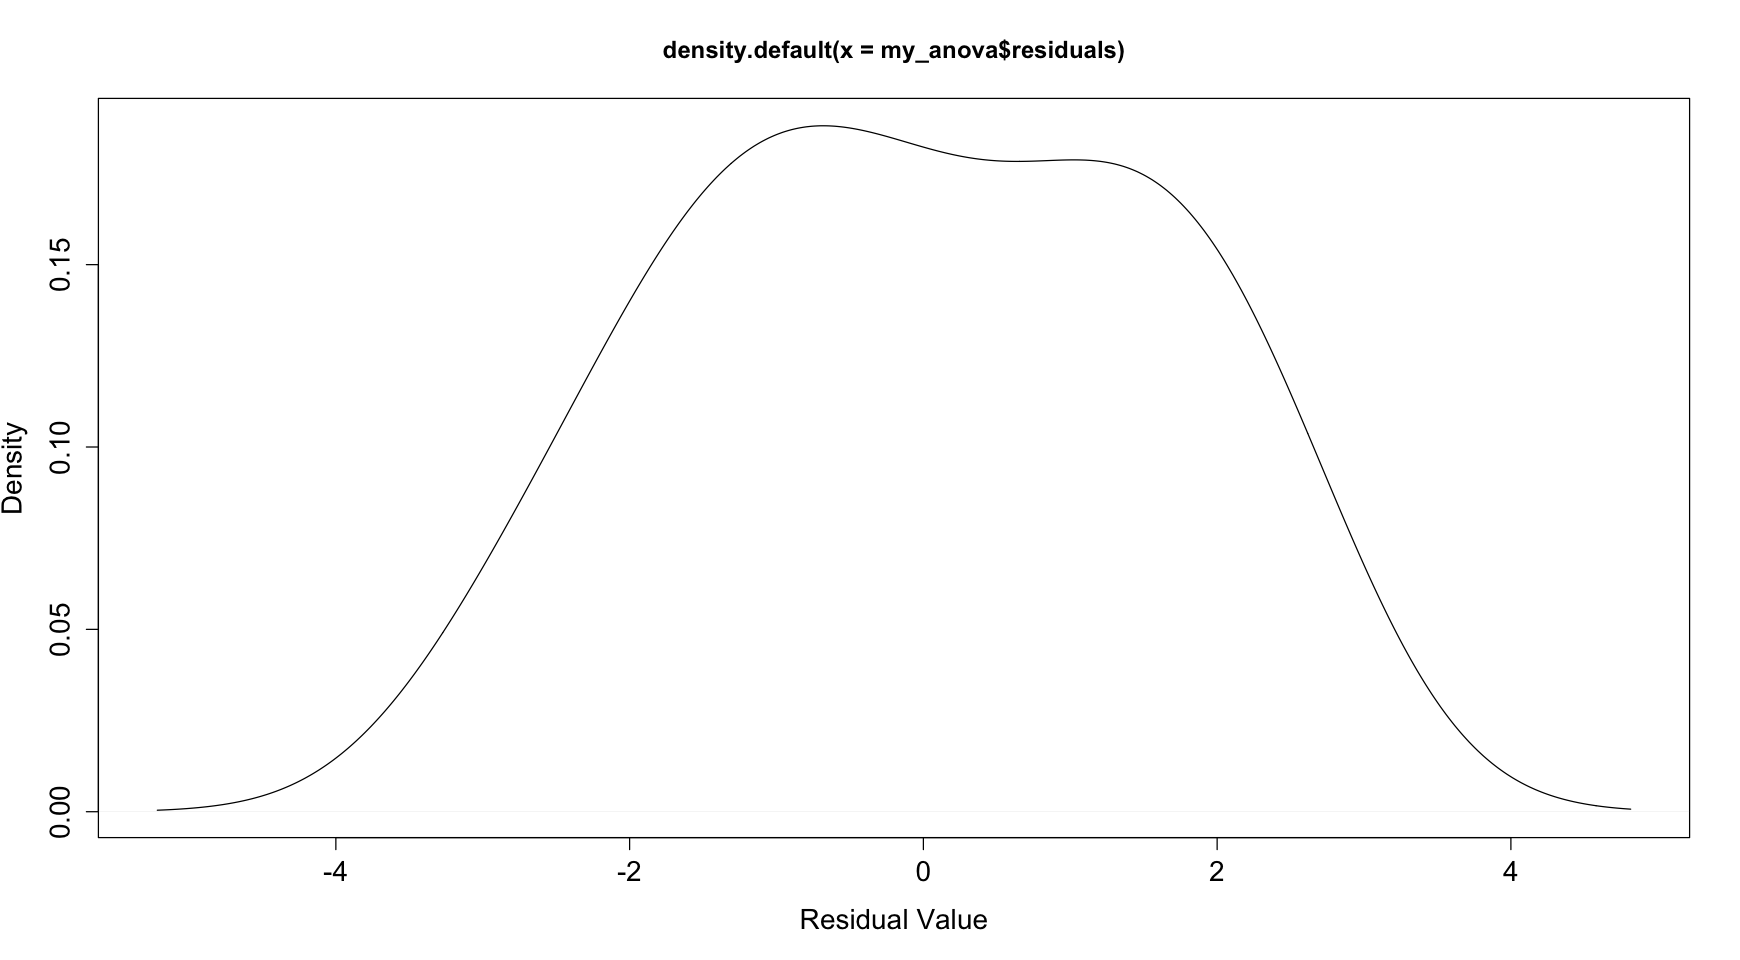

In [249]:
plot(density(my_anova$residuals),xlab = 'Residual Value',cex.axis=1.4,cex.lab=1.4)

# `Shapiro Test:`

+ Null Hypothesis: $H_o$= data come from a normal distribution

`Our results show that the p-value (0.365) >` $\alpha=0.05$ `therefore we keep the null hypothesis`


In [29]:
shapiro.test(my_anova$residuals)


	Shapiro-Wilk normality test

data:  my_anova$residuals
W = 0.94986, p-value = 0.365


In [241]:
summary(aov(lm(data = data)))

            Df Sum Sq Mean Sq F value Pr(>F)  
group        3  24.15    8.05   2.556 0.0917 .
Residuals   16  50.40    3.15                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Test for Eqaulity of Variance:
+ boxplot,levene test, oneway test

Are the variances equal along the samples (various diets)?

+ The one issue is group 02, therefore I decided to use the levene test
    + Levene test less sensitive to fluctuations: $H_o=$ variances equal
        + p-value: 0.63 > $\alpha=0.05$ we keep/don't!  reject null hypothesis

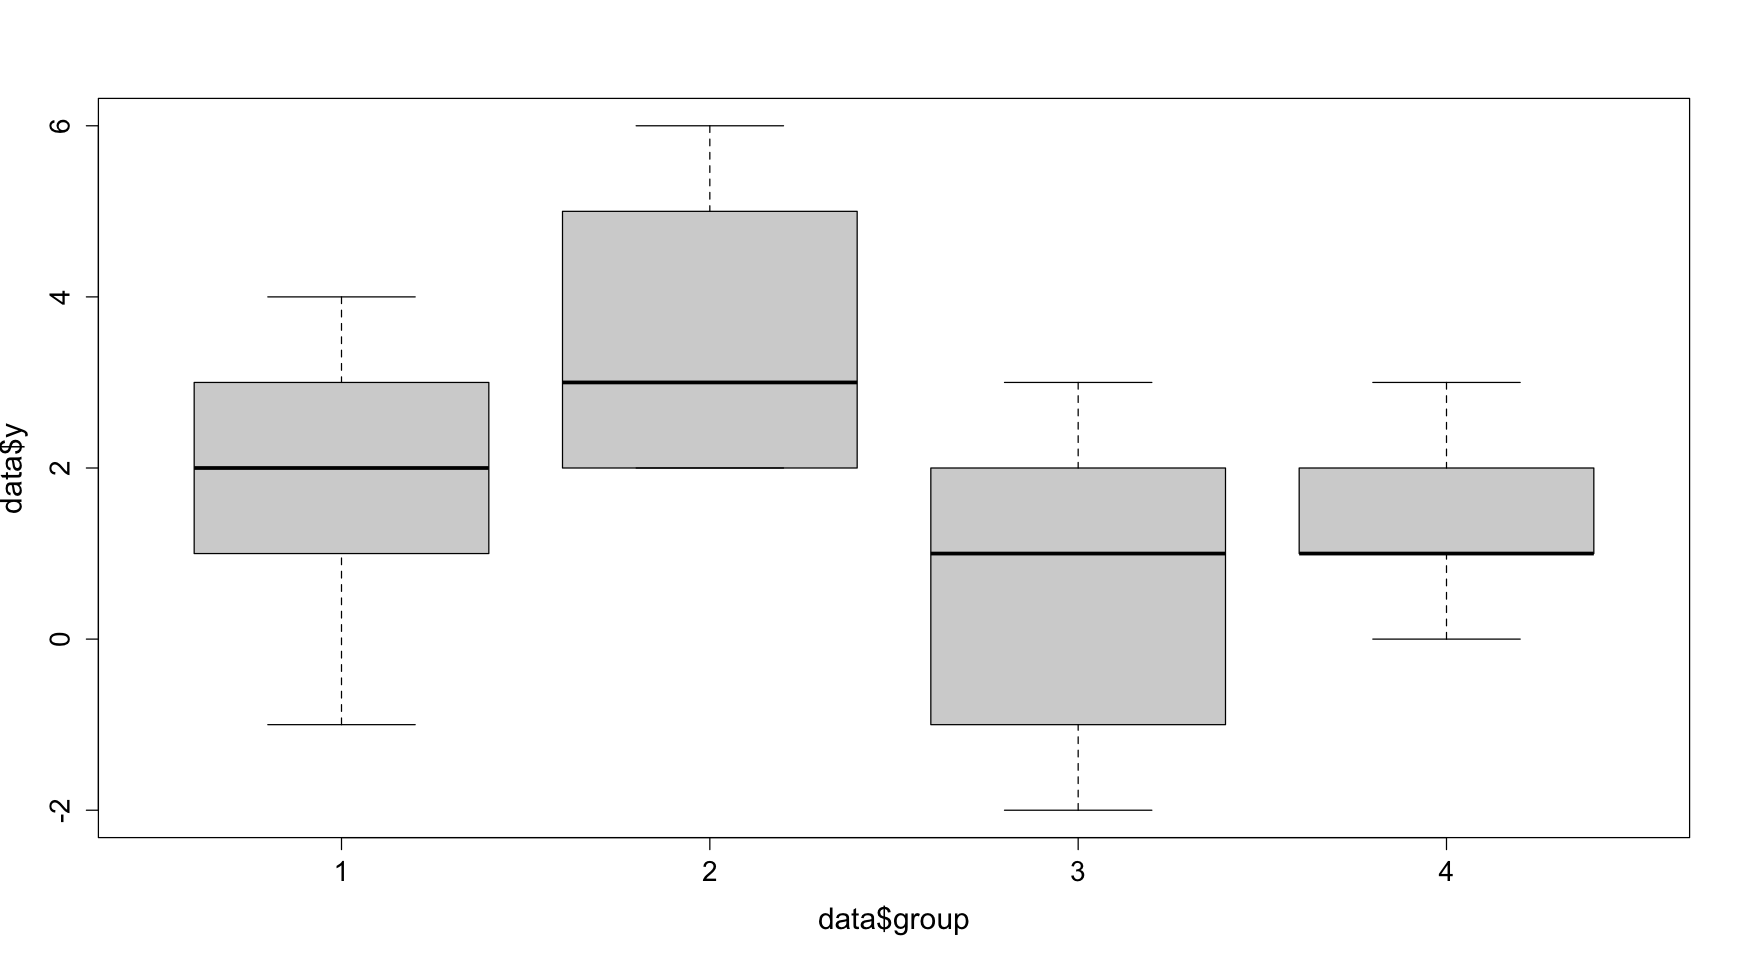

In [242]:
# Boxplot of Residuals from Anova: compare variance
boxplot(data$y~data$group,cex.lab=1.5,cex.axis=1.4)

In [243]:
library(car)
leveneTest(y~group,data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,0.5217391,0.673428
,16,NA,NA


In [245]:
oneway.test(y ~ groups,
  data = data,
  var.equal = TRUE # assuming equal variances
)


	One-way analysis of means

data:  y and groups
F = 2.5556, num df = 3, denom df = 16, p-value = 0.09173


# `Independence:`

+ Good experimental design should cover this, but let's evaluate with a test: Durbin-Watson
    + you have to first do a linear regression model then apply the test
    + $H_o=$ coefficient=0 autocorrelation

In [38]:
durbinWatsonTest(lm(y~groups,data = data))

 lag Autocorrelation D-W Statistic p-value
   1      -0.2147705      2.424996   0.466
 Alternative hypothesis: rho != 0

In [253]:
summary(aov(lm(data = data)))

            Df Sum Sq Mean Sq F value Pr(>F)  
group        3  24.15    8.05   2.556 0.0917 .
Residuals   16  50.40    3.15                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# <font color=red>Like</font>, Share &

# <font color=red>SUB</font>scribe

`Help Support the Channel: Buy Me A Coffee, @mrfugudatasci`

# `Assumptions Expanded:`

(`Good if you are doing experimental design)`

+ `Random Sampling`
+ `Equal Variance`
+ `Independence of Errors`
+ `Normal Distributions of Errors`
+ `Additive Treatment Effects`

`Random Sampling:` if data were not collected randomly, then there will be probability bias.

`Equal Variance:` assuming that the `sampling errors` don't differ significantly from one treatment to the next. Meaning that the `SSE` doen't differ significantly.
+ ANOVA: is comparing the differences of `between` treatment/group means and `within` treatment/group variations.
    + `NOTE:` of the variances are the same-ish, but the means are different don't assume that the treatments are giving same effects.
    
`Independence of Error:` you will find that your errors are not independent for real data, more often than not this is why we have to (find ways to) minimize this.

`Here are a few a ways:`
+ consider `block designs` which are creating combinations of your experiment
+ try to do `grouping/membership` beforehand, then try `block design` 
+ you can try `replication`
+ `randomizing` your data

`Normal Distributions of Errors:` since most dataset have skewness anyway (i.e. real data). we need to figure out ways to combat this.

`Additive Treatment Effects:` for multi-factor experiments; ANOVA assumes that the different treatments are additive. For example, if we had an experiment with 2 treatments and multiple levels we could assume that the response to treatments could be added together even if one had high dosage and the other had a low dosage.
+ But, if there was an interaction we would have to set this up differently. if you have a multiplicative event then try using a transformation of the data such as taking a log.

# `Citations & Help:`

# ◔̯◔

https://crumplab.github.io/statistics/anova.html

https://www.investopedia.com/terms/a/anova.asp

https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/#:~:text=Analysis%20of%20variance%20(ANOVA)%20is,the%20means%20of%20different%20samples.&text=Another%20measure%20to%20compare%20the%20samples%20is%20called%20a%20t%2Dtest

https://www.scribbr.com/statistics/anova-in-r/

http://homepages.inf.ed.ac.uk/bwebb/statistics/ANOVA_in_R.pdf

http://pages.stat.wisc.edu/~yandell/st571/R/anova.pdf

https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTesting-ANOVA/BS704_HypothesisTesting-Anova_print.html

https://towardsdatascience.com/one-of-the-most-common-unintentional-mistakes-when-running-an-anova-in-r-cfa55d332a

https://daviddalpiaz.github.io/appliedstats/analysis-of-variance.html

http://www.simonqueenborough.info/R/stats-basic/anova.html

`Very good and thorough explanation!`

https://towardsdatascience.com/anova-in-r-4a4a4edc9448

`qqplot`

https://cran.r-project.org/web/packages/qqplotr/vignettes/introduction.html

https://boostedml.com/2019/03/linear-regression-plots-how-to-read-a-qq-plot.html

`increase R default plot parameters`

https://stackoverflow.com/questions/4241798/how-to-increase-font-size-in-a-plot-in-r

`Video By hand calculations`

https://www.youtube.com/watch?v=-yQb_ZJnFXw